#### Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandasql as ps
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# fetch the data (Training , Testing)
trainData = pd.read_excel('Data_Train.xlsx')
testData = pd.read_excel('Test_set.xlsx')

print(f'Size of Training Data {trainData.shape}')
print(f'Size of Testing Data {testData.shape}')

Size of Training Data (10683, 11)
Size of Testing Data (2671, 10)


In [94]:
trainData.drop([9039],axis = 0)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [95]:
# getting first 5 rows for the data
trainData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
# getting data columns and columns type
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### observation
###### all columns are textual except price we should handle this columns by converting it into numerical columns 

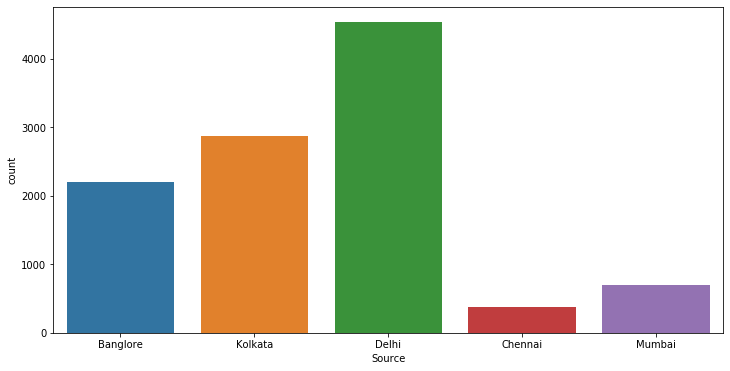

In [97]:
# let's plot "source" column
plt.figure(figsize=(12,6))
sns.countplot(data=trainData , x='Source')

##### most journey take off from
[1] Delhi  
[2] Kolkata  
[3] Bangalore   
[4] Mumbai   
[5] Chennai 


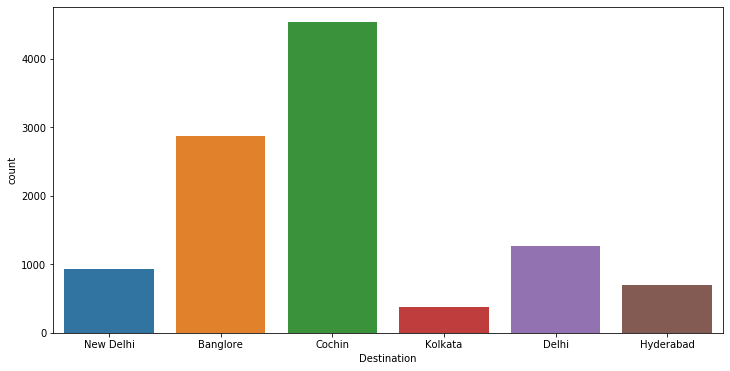

In [98]:
# let's plot "source" column
plt.figure(figsize=(12,6))
sns.countplot(data=trainData , x='Destination')

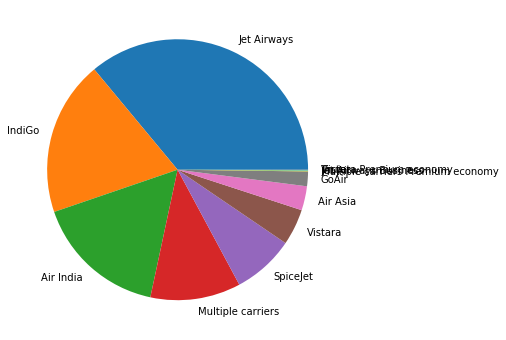

In [99]:
# plotting "Airlines" columns in pie
airlines = trainData['Airline'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(airlines, labels=airlines.index)
plt.show()

In [100]:
# getting the mean of total price for each airline
values_airline = trainData['Airline'].value_counts()
listMeanPrice_airline ={}
for i in range(len(values_airline)):
    listMeanPrice_airline[values_airline.index[i]]=trainData.loc[trainData.Airline == values_airline.index[i] , 'Price'].mean()
listMeanPrice_airline_sorted = sorted(listMeanPrice_airline.items(), key=lambda x: x[1] , reverse=True)
listMeanPrice_airline_sorted

[('Jet Airways Business', 58358.666666666664),
 ('Jet Airways', 11643.92335671603),
 ('Multiple carriers Premium economy', 11418.846153846154),
 ('Multiple carriers', 10902.678093645485),
 ('Air India', 9611.210616438357),
 ('Vistara Premium economy', 8962.333333333334),
 ('Vistara', 7796.348643006263),
 ('GoAir', 5861.056701030928),
 ('IndiGo', 5673.68290306868),
 ('Air Asia', 5590.260188087775),
 ('SpiceJet', 4338.284841075794),
 ('Trujet', 4140.0)]

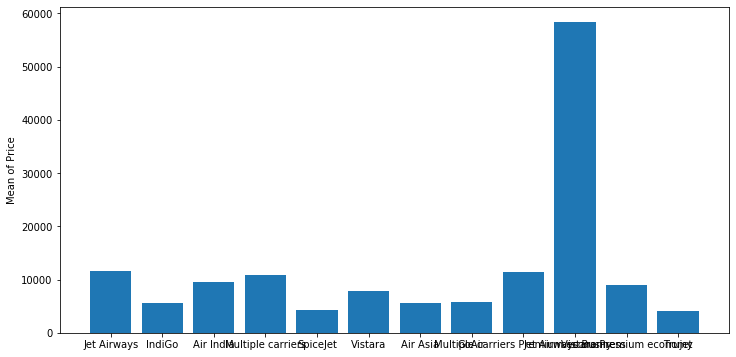

In [101]:
# plotting airline names in x axis and mean of total price in y axis
plt.figure(figsize=(12,6))
plt.bar(listMeanPrice_airline.keys(),listMeanPrice_airline.values())
plt.ylabel("Mean of Price")
plt.show()

In [102]:
# combining similar values 
trainData.loc[trainData.Additional_Info == 'No Info','Additional_Info'] = "No info"

In [103]:
values_additionalInfo = trainData['Additional_Info'].value_counts()
values_additionalInfo

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [104]:
# getting the mean of price depending on "additional info" and putting it in a dictionary
listMeanPrice_AdditionalInfo ={}
for i in range(len(values_additionalInfo)):
    listMeanPrice_AdditionalInfo[values_additionalInfo.index[i]]=trainData.loc[trainData.Additional_Info == values_additionalInfo.index[i] , 'Price'].mean()
listMeanPrice_AdditionalInfo

{'No info': 9140.926090081457,
 'In-flight meal not included': 9471.834510595358,
 'No check-in baggage included': 3645.15625,
 '1 Long layover': 22109.63157894737,
 'Change airports': 16800.714285714286,
 'Business class': 56811.25,
 '2 Long layover': 26480.0,
 '1 Short layover': 26743.0,
 'Red-eye flight': 10873.0}

No handles with labels found to put in legend.


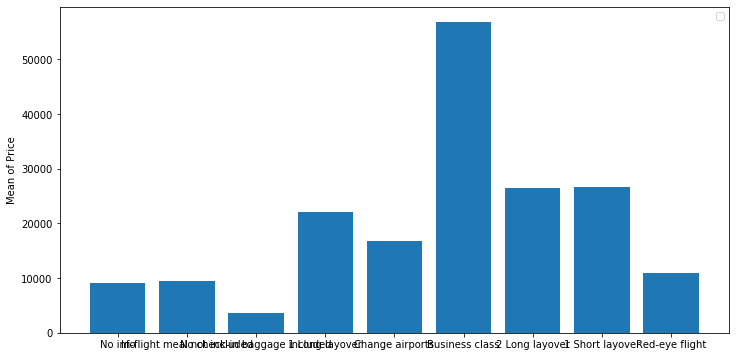

In [105]:
plt.figure(figsize=(12,6))
plt.bar(listMeanPrice_AdditionalInfo.keys(),listMeanPrice_AdditionalInfo.values())
plt.legend()
plt.ylabel("Mean of Price")
plt.show()

In [106]:
values_stops = trainData['Total_Stops'].value_counts()
listMeanPrice_Total_stops ={}
for i in range(len(values_stops)):
    listMeanPrice_Total_stops[values_stops.index[i]]=trainData.loc[trainData.Total_Stops == values_stops.index[i] , 'Price'].mean()
listMeanPrice_Total_stops

{'1 stop': 10594.123555555556,
 'non-stop': 5024.900315095961,
 '2 stops': 12715.807894736841,
 '3 stops': 13112.0,
 '4 stops': 17686.0}

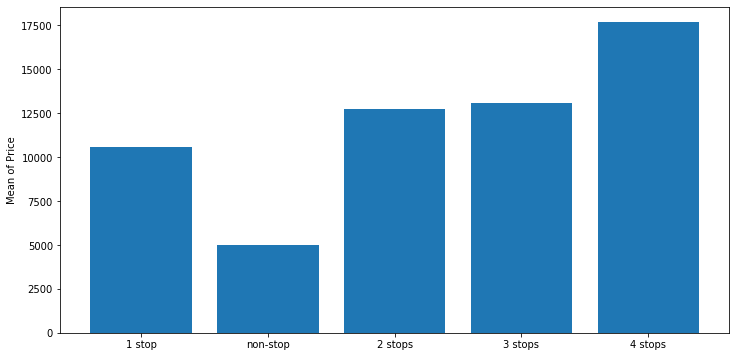

In [107]:
plt.figure(figsize=(12,6))
plt.bar(listMeanPrice_Total_stops.keys(),listMeanPrice_Total_stops.values())
plt.ylabel("Mean of Price")
plt.show()

In [108]:
# convert "duration" column from hour and minutes timing into seconds
def convertTime(time:str):
    try:
        hour = int(time.split()[0].replace('h',"")) * 60 * 60
    except:
        hour = 0
    try:
        second = int(time.split()[1].replace('m',"")) * 60
    except:
        second = 0
    return hour + second

In [109]:
# apply the fuction above in trainData by using apply lambda fuction
trainData['Duration'] = trainData['Duration'].apply((lambda x :convertTime(x)))

### Data Processing
##### in data processing section we will handle missing value and categorical attributes

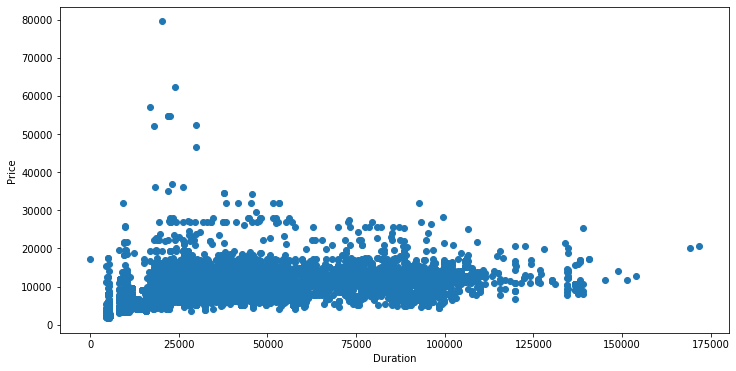

In [110]:
# plotting the duration of journey in X-axis and price of journey in y-axis
plt.figure(figsize=(12,6))
plt.scatter(x=trainData['Duration'],y=trainData['Price'])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

> there are few outliers we sould remove it from our dataFrame

In [111]:
### Remove the outliers from ourdata
trainData.loc[trainData['Price'] > 30000 , "Price"] = trainData['Price'].median()

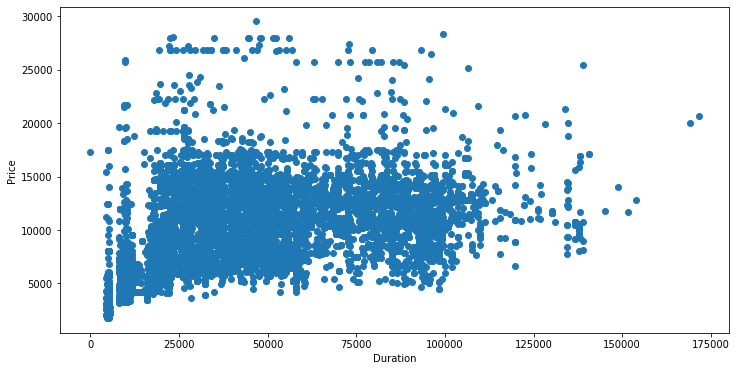

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(x=trainData['Duration'],y=trainData['Price'])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

In [113]:
# convert "Date_of_Journey" column from day/month/year into there columns day , month , year
trainData[['day','month','year']] = trainData.Date_of_Journey.str.split('/',expand=True)
trainData.drop('Date_of_Journey',axis = 1,inplace = True)

In [114]:
trainData['day'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [115]:
# combining similar values 
trainData['day'] = trainData['day'].astype(int)
trainData['month'] = trainData['month'].astype(int)

In [116]:
trainData['day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

Text(0, 0.5, 'TotalPriceOfDay')

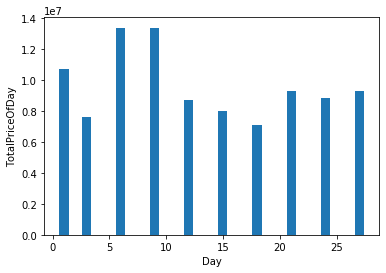

In [117]:
# getting sum of total prices for each day
topDay = ps.sqldf("SELECT day,SUM(PRICE) as TotalPriceOfDay FROM trainData GROUP BY day ORDER BY TotalPriceOfDay DESC")
plt.bar(topDay['day'],topDay['TotalPriceOfDay'])
plt.xlabel('Day')
plt.ylabel('TotalPriceOfDay')

Text(0, 0.5, 'TotalPriceOfMonth')

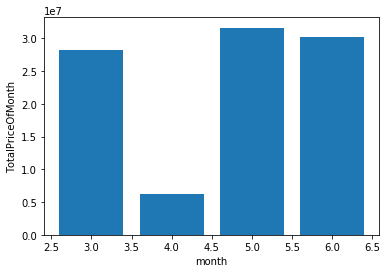

In [118]:
# getting sum of total prices for each month
topDay = ps.sqldf("SELECT month,SUM(PRICE) as TotalPriceOfMonth FROM trainData GROUP BY month ORDER BY TotalPriceOfMonth DESC")
plt.bar(topDay['month'],topDay['TotalPriceOfMonth'])
plt.xlabel('month')
plt.ylabel('TotalPriceOfMonth')

In [119]:
# getting the sum of null values in our dataset
trainData.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
day                0
month              0
year               0
dtype: int64

In [120]:
# let's drop the columns that are not important
droped_columns = ['Dep_Time','Arrival_Time','year']
trainData.drop(droped_columns,inplace=True , axis=1)

In [121]:
trainData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,10200,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,26700,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,68400,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,19500,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,17100,1 stop,No info,13302.0,1,3


In [122]:
# convert "total stops" to numerical
dict_stops = {"non-stop":0 , "nan" : 0 , "1 stop":1 , "2 stops":2 ,"3 stops":3 , "4 stops":4}
trainData['Total_Stops'] = trainData['Total_Stops'].map(dict_stops)

In [123]:
trainData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,10200,0.0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,26700,2.0,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,68400,2.0,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,19500,1.0,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,17100,1.0,No info,13302.0,1,3


In [124]:
# splitting route columns into 5 columns Rout1 , Route2 ....
trainData['Route1'] = trainData['Route'].str.split("→").str[0]
trainData['Route2'] = trainData['Route'].str.split("→").str[1]
trainData['Route3'] = trainData['Route'].str.split("→").str[2]
trainData['Route4'] = trainData['Route'].str.split("→").str[2]
trainData['Route5'] = trainData['Route'].str.split("→").str[4]
trainData.drop('Route',inplace=True,axis = 1)

In [125]:
# filling null values in columns Route1 , Route2 .. with None
trainData['Route1'].fillna('None',inplace=True)
trainData['Route2'].fillna('None',inplace=True)
trainData['Route3'].fillna('None',inplace=True)
trainData['Route4'].fillna('None',inplace=True)
trainData['Route5'].fillna('None',inplace=True)

In [126]:
trainData.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,10200,0.0,No info,3897.0,24,3,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,26700,2.0,No info,7662.0,1,5,CCU,IXR,BBI,BBI,None
2,Jet Airways,Delhi,Cochin,68400,2.0,No info,13882.0,9,6,DEL,LKO,BOM,BOM,None
3,IndiGo,Kolkata,Banglore,19500,1.0,No info,6218.0,12,5,CCU,NAG,BLR,BLR,None
4,IndiGo,Banglore,New Delhi,17100,1.0,No info,13302.0,1,3,BLR,NAG,DEL,DEL,None


In [127]:
# "airline" column in categorical column we will perform onehotencoding 
airlines = pd.get_dummies(trainData['Airline'],drop_first=True)
airlines

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [128]:
trainData.drop('Airline',inplace=True , axis = 1)
trainData.head()

,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,Banglore,New Delhi,10200,0.0,No info,3897.0,24,3,BLR,DEL,None,None,None
1,Kolkata,Banglore,26700,2.0,No info,7662.0,1,5,CCU,IXR,BBI,BBI,None
2,Delhi,Cochin,68400,2.0,No info,13882.0,9,6,DEL,LKO,BOM,BOM,None
3,Kolkata,Banglore,19500,1.0,No info,6218.0,12,5,CCU,NAG,BLR,BLR,None
4,Banglore,New Delhi,17100,1.0,No info,13302.0,1,3,BLR,NAG,DEL,DEL,None


In [129]:
# "Source" column in categorical column we will perform onehotencoding 
sources = pd.get_dummies(trainData['Source'],drop_first=True)

In [130]:
trainData.drop('Source',inplace=True , axis = 1)
trainData.head()

,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,New Delhi,10200,0.0,No info,3897.0,24,3,BLR,DEL,None,None,None
1,Banglore,26700,2.0,No info,7662.0,1,5,CCU,IXR,BBI,BBI,None
2,Cochin,68400,2.0,No info,13882.0,9,6,DEL,LKO,BOM,BOM,None
3,Banglore,19500,1.0,No info,6218.0,12,5,CCU,NAG,BLR,BLR,None
4,New Delhi,17100,1.0,No info,13302.0,1,3,BLR,NAG,DEL,DEL,None


In [131]:
# "Destination" column in categorical column we will perform onehotencoding 
destination = pd.get_dummies(trainData['Destination'],drop_first=True)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [132]:
trainData.drop('Destination',inplace=True , axis = 1)
trainData.head()

,Duration,Total_Stops,Additional_Info,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,10200,0.0,No info,3897.0,24,3,BLR,DEL,None,None,None
1,26700,2.0,No info,7662.0,1,5,CCU,IXR,BBI,BBI,None
2,68400,2.0,No info,13882.0,9,6,DEL,LKO,BOM,BOM,None
3,19500,1.0,No info,6218.0,12,5,CCU,NAG,BLR,BLR,None
4,17100,1.0,No info,13302.0,1,3,BLR,NAG,DEL,DEL,None


In [133]:
# "Additional_Info" column in categorical column we will perform onehotencoding 
additional_Info = pd.get_dummies(trainData['Additional_Info'],drop_first=True)

In [134]:
trainData.drop('Additional_Info',inplace=True , axis = 1)
trainData.head()

,Duration,Total_Stops,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,10200,0.0,3897.0,24,3,BLR,DEL,None,None,None
1,26700,2.0,7662.0,1,5,CCU,IXR,BBI,BBI,None
2,68400,2.0,13882.0,9,6,DEL,LKO,BOM,BOM,None
3,19500,1.0,6218.0,12,5,CCU,NAG,BLR,BLR,None
4,17100,1.0,13302.0,1,3,BLR,NAG,DEL,DEL,None


In [135]:
# performing labelencoder in Route1 , Route2 .....
encoder = LabelEncoder()
for i in ['Route1','Route2','Route3','Route4','Route5',"day","month"]:
    trainData[i] = encoder.fit_transform(trainData[i])

In [136]:
trainData.head()

,Duration,Total_Stops,Price,day,month,Route1,Route2,Route3,Route4,Route5
0,10200,0.0,3897.0,8,0,0,13,29,29,5
1,26700,2.0,7662.0,0,2,2,25,1,1,5
2,68400,2.0,13882.0,3,3,3,32,4,4,5
3,19500,1.0,6218.0,4,2,2,34,3,3,5
4,17100,1.0,13302.0,0,0,0,34,8,8,5


In [137]:
trainData = pd.concat([trainData,additional_Info,destination,sources,airlines],axis = 1)

### Building Model

In [138]:
trainData.head()

,Duration,Total_Stops,Price,day,month,Route1,Route2,Route3,Route4,Route5,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,10200,0.0,3897.0,8,0,0,13,29,29,5,...,0,1,0,0,0,0,0,0,0,0
1,26700,2.0,7662.0,0,2,2,25,1,1,5,...,0,0,0,0,0,0,0,0,0,0
2,68400,2.0,13882.0,3,3,3,32,4,4,5,...,0,0,1,0,0,0,0,0,0,0
3,19500,1.0,6218.0,4,2,2,34,3,3,5,...,0,1,0,0,0,0,0,0,0,0
4,17100,1.0,13302.0,0,0,0,34,8,8,5,...,0,1,0,0,0,0,0,0,0,0


In [139]:
trainData.dropna(inplace=True)

In [140]:
trainData = trainData.loc[:,~trainData.columns.duplicated()]
trainData

,Duration,Total_Stops,Price,day,month,Route1,Route2,Route3,Route4,Route5,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,10200,0.0,3897.0,8,0,0,13,29,29,5,...,0,1,0,0,0,0,0,0,0,0
1,26700,2.0,7662.0,0,2,2,25,1,1,5,...,0,0,0,0,0,0,0,0,0,0
2,68400,2.0,13882.0,3,3,3,32,4,4,5,...,0,0,1,0,0,0,0,0,0,0
3,19500,1.0,6218.0,4,2,2,34,3,3,5,...,0,1,0,0,0,0,0,0,0,0
4,17100,1.0,13302.0,0,0,0,34,8,8,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9000,0.0,4107.0,3,1,2,5,29,29,5,...,0,0,0,0,0,0,0,0,0,0
10679,9300,0.0,4145.0,9,1,2,5,29,29,5,...,0,0,0,0,0,0,0,0,0,0
10680,10800,0.0,7229.0,9,1,0,13,29,29,5,...,0,0,1,0,0,0,0,0,0,0
10681,9600,0.0,12648.0,0,0,0,13,29,29,5,...,0,0,0,0,0,0,0,0,1,0


In [141]:
X = trainData.drop(columns=['Price'],axis = 1)
y = trainData['Price']
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [142]:
# fullPipeline = ColumnTransformer([
#     ("cat", OneHotEncoder(),catergoricalColumns),
#     ('num' , StandardScaler() ,numerical_columns )
# ])

In [143]:
# X_train = fullPipeline.fit_transform(X_train)
# X_test = fullPipeline.transform(X_test)

In [144]:
models = {
    "LR": LinearRegression(),
#     "SVM": SVR(kernel="linear",verbose=True),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=10,),
    "DT": DecisionTreeRegressor(random_state=42),
    "Xg":XGBRegressor(n_estimators=100)
}

In [145]:
for name,model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Training Score: {model.score(X_train,y_train)}')
    print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-'*30)

Training Model LR 
--------------
Training Score: 0.6990464857588865
Training RMSE: 2341.922878327539
Testing RMSE: 2432.340835821757
------------------------------
Training Model RF 
--------------
Training Score: 0.9277977280541415
Training RMSE: 1147.0921599999538
Testing RMSE: 1603.325133788888
------------------------------
Training Model DT 
--------------
Training Score: 0.986204348116828
Training RMSE: 501.4111569293767
Testing RMSE: 1833.8335462279845
------------------------------
Training Model Xg 
--------------
Training Score: 0.9505489678523152
Training RMSE: 949.3154742401565
Testing RMSE: 1431.5586976699442
------------------------------


In [146]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]
pridect_some_data = models['Xg'].predict(some_data)
print("Predictions using Random Forests \n {predict}".format(predict=pridect_some_data))

Predictions using Random Forests 
 [ 6087.213   7851.5845 14068.808   6553.311  13405.466 ]


In [147]:
print("Labels:", list(some_labels))

Labels: [3897.0, 7662.0, 13882.0, 6218.0, 13302.0]


### HyperParameter Tuning

In [148]:
# decision Tree
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}
clf = models['DT']
grid_cv = RandomizedSearchCV(clf, param_grid,scoring="neg_mean_squared_error" ,n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param", grid_cv.best_params_)
print("CV score ", grid_cv.best_score_)
print("Train RMSE: ",np.sqrt(mean_squared_error(y_train, grid_cv.predict(X_train))) )
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, grid_cv.predict(X_test))))

Param {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 15}
CV score  -2788600.7646357277
Train RMSE:  1044.5295523127184
Test RMSE:  1667.0315262557672


In [149]:
# Random Forest
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [30, 40, 50, 60, 70, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600,]
             }

clf = models['RF']
grid_cv = RandomizedSearchCV(clf, param_grid,scoring="neg_mean_squared_error" ,n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param", grid_cv.best_params_)
print("CV score ", grid_cv.best_score_)
print("Train RMSE: ",np.sqrt(mean_squared_error(y_train, grid_cv.predict(X_train))) )
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, grid_cv.predict(X_test))))

Param {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
CV score  -2204548.9940755777
Train RMSE:  907.7166123653667
Test RMSE:  1534.2666979699823


In [ ]:
# XGBoost
param_grid = {
 'max_depth': [30, 40, 50, 60, 70, None],
 'n_estimators': [200, 400, 600,]
             }

clf = models['Xg']
grid_cv = RandomizedSearchCV(clf, param_grid,scoring="neg_mean_squared_error" ,n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param", grid_cv.best_params_)
print("CV score ", grid_cv.best_score_)
print("Train RMSE: ",np.sqrt(mean_squared_error(y_train, grid_cv.predict(X_train))) )
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, grid_cv.predict(X_test))))

In [ ]:
models = {
    "LR": LinearRegression(),
#     "SVM": SVR(kernel="linear",verbose=True),
    "RF": RandomForestRegressor(n_estimators=300,min_samples_split=10,max_depth = 30),
    "DT": DecisionTreeRegressor(random_state=42,min_samples_split=10 , min_samples_leaf= 1 , max_depth = 20),
    "Xg":XGBRegressor(n_estimators=200 ,max_depth=None)
}

In [ ]:
for name,model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Training Score: {model.score(X_train,y_train)}')
    print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-'*30)